## SARIMAX Loop 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import pickle


In [2]:
df = pd.read_csv('main_data.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

econ_weather_data = df[[
'GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ',
'ExpGoServ', 'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat',
'GloUranium', 'GloPalmOil', 'GloBrentCrude', 'Real_Estate_Loans', 'SP500',
'Dow_Jones_Target', 'NASDAQ', 'Federal_Debt', 'temperature_2m_mean (°C) NY', 'daylight_duration (s) NY',
'rain_sum (mm) NY', 'snowfall_sum (cm) NY',
'wind_speed_10m_max (km/h) NY', 'temperature_2m_mean (°C) LA',
'daylight_duration (s) LA', 'rain_sum (mm) LA', 'snowfall_sum (cm) LA',
'wind_speed_10m_max (km/h) LA', 'temperature_2m_mean (°C) CH',
'daylight_duration (s) CH', 'rain_sum (mm) CH', 'snowfall_sum (cm) CH',
'wind_speed_10m_max (km/h) CH', 'temperature_2m_mean (°C) SF',
'daylight_duration (s) SF', 'rain_sum (mm) SF', 'snowfall_sum (cm) SF',
'wind_speed_10m_max (km/h) SF', 'temperature_2m_mean (°C) HU',
'daylight_duration (s) HU', 'rain_sum (mm) HU', 'snowfall_sum (cm) HU',
'wind_speed_10m_max (km/h) HU', 'temperature_2m_mean (°C) DL',
'daylight_duration (s) DL', 'rain_sum (mm) DL', 'snowfall_sum (cm) DL',
'wind_speed_10m_max (km/h) DL', 'temperature_2m_mean (°C) WA',
'daylight_duration (s) WA', 'rain_sum (mm) WA', 'snowfall_sum (cm) WA',
'wind_speed_10m_max (km/h) WA', 'temperature_2m_mean (°C) AT',
'daylight_duration (s) AT', 'rain_sum (mm) AT', 'snowfall_sum (cm) AT',
'wind_speed_10m_max (km/h) AT', 'temperature_2m_mean (°C) SE',
'daylight_duration (s) SE', 'rain_sum (mm) SE', 'snowfall_sum (cm) SE',
'wind_speed_10m_max (km/h) SE'
]]

# Define exogenous variables (without 'Date')
exog = econ_weather_data[['GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ',
'ExpGoServ', 'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat',
'GloUranium', 'GloPalmOil', 'GloBrentCrude', 'Real_Estate_Loans', 'SP500',
'NASDAQ', 'Federal_Debt', 'temperature_2m_mean (°C) NY', 'daylight_duration (s) NY',
'rain_sum (mm) NY', 'snowfall_sum (cm) NY',
'wind_speed_10m_max (km/h) NY', 'temperature_2m_mean (°C) LA',
'daylight_duration (s) LA', 'rain_sum (mm) LA', 'snowfall_sum (cm) LA',
'wind_speed_10m_max (km/h) LA', 'temperature_2m_mean (°C) CH',
'daylight_duration (s) CH', 'rain_sum (mm) CH', 'snowfall_sum (cm) CH',
'wind_speed_10m_max (km/h) CH', 'temperature_2m_mean (°C) SF',
'daylight_duration (s) SF', 'rain_sum (mm) SF', 'snowfall_sum (cm) SF',
'wind_speed_10m_max (km/h) SF', 'temperature_2m_mean (°C) HU',
'daylight_duration (s) HU', 'rain_sum (mm) HU', 'snowfall_sum (cm) HU',
'wind_speed_10m_max (km/h) HU', 'temperature_2m_mean (°C) DL',
'daylight_duration (s) DL', 'rain_sum (mm) DL', 'snowfall_sum (cm) DL',
'wind_speed_10m_max (km/h) DL', 'temperature_2m_mean (°C) WA',
'daylight_duration (s) WA', 'rain_sum (mm) WA', 'snowfall_sum (cm) WA',
'wind_speed_10m_max (km/h) WA', 'temperature_2m_mean (°C) AT',
'daylight_duration (s) AT', 'rain_sum (mm) AT', 'snowfall_sum (cm) AT',
'wind_speed_10m_max (km/h) AT', 'temperature_2m_mean (°C) SE',
'daylight_duration (s) SE', 'rain_sum (mm) SE', 'snowfall_sum (cm) SE',
'wind_speed_10m_max (km/h) SE'
]]

# Split data into training and test sets (85% train, 15% test)
train_size = int(len(econ_weather_data) * 0.85)
train, test = econ_weather_data[:train_size], econ_weather_data[train_size:]

# Split the exogenous variables
train_exog, test_exog = exog[:train_size], exog[train_size:]

In [3]:

#model_sarimax = SARIMAX(train['Dow_Jones_Target'], exog=train_exog, order=(2, 1, 2), seasonal_order=(3, 1, 1, 4))
#model = SARIMAX(train['Dow_Jones_Target'], exog=train_exog, order=(2, 1, 3), seasonal_order=(3, 1, 1, 80)) #MAE: 2421.9170729942966 MAPE: 6.79215778437978%
#model = SARIMAX(train['Dow_Jones_Target'], exog=train_exog, order=(2, 1, 3), seasonal_order=(3, 1, 1, 140)) #kernel crashed
#model_sarimax = SARIMAX(train['Dow_Jones_Target'], exog=train_exog, order=(2, 1, 3), seasonal_order=(3, 1, 1, 98)) #MAE: 1139.1693786540463 MAPE: 3.182627073760702% Time: 146min
model_sarimax_l2 = SARIMAX(train['Dow_Jones_Target'], exog=train_exog, order=(2, 1, 3), seasonal_order=(3, 1, 1, 90))

model_fit_sarimax_l2 = model_sarimax_l2.fit()

forecast = model_fit_sarimax_l2.get_forecast(steps=len(test), exog=test_exog)

forecast_values = forecast.predicted_mean

/Users/maxquarder/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/maxquarder/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           73     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33067D+00    |proj g|=  2.07945D+00


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   73      1     21      1     0     0   2.079D+00   5.331D+00
  F =   5.3306730439983676     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/maxquarder/.pyenv/versions/3.11.6/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(test['Dow_Jones_Target'], forecast_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(test['Dow_Jones_Target'], forecast_values)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAPE
mape = mean_absolute_percentage_error(test['Dow_Jones_Target'], forecast_values)
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')


Mean Absolute Error (MAE): 1341.4427132559244
Mean Squared Error (MSE): 2634696.8197537647
Root Mean Squared Error (RMSE): 1623.174919641677
Mean Absolute Percentage Error (MAPE): 3.75%


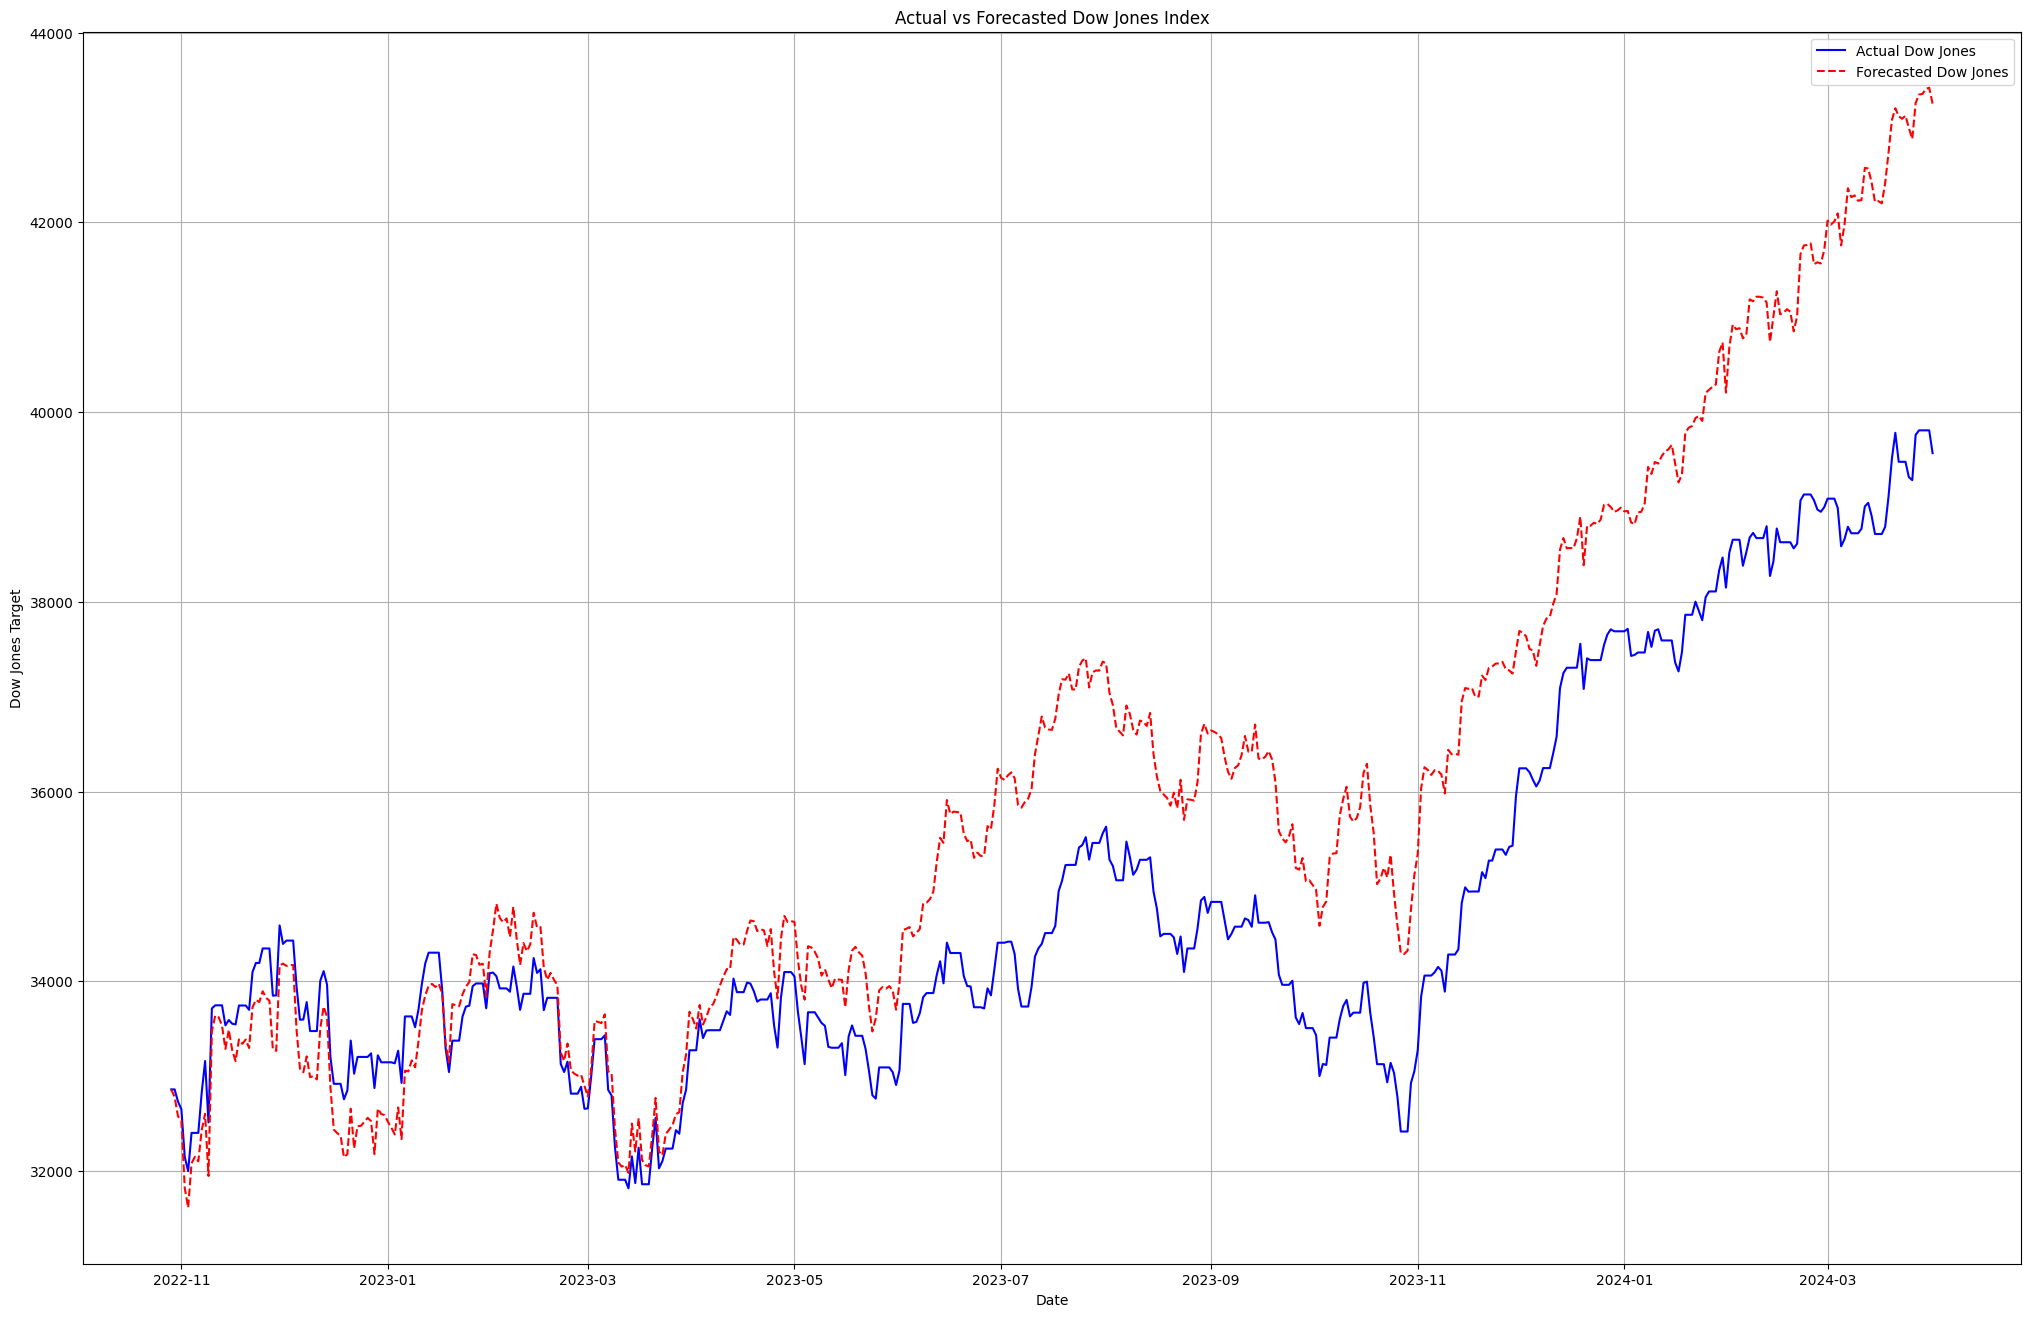

MAE: 1341.4427132559244
MAPE: 3.75415115923669%


In [5]:

# Step 10: Plot actual vs forecasted values
plt.figure(figsize=(25, 16))

# Plot actual Dow Jones values
plt.plot(test.index, test['Dow_Jones_Target'], label='Actual Dow Jones', color='blue')

# Plot forecasted Dow Jones values
plt.plot(test.index, forecast_values, label='Forecasted Dow Jones', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Dow Jones Target')
plt.title('Actual vs Forecasted Dow Jones Index')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_forecasted_dow_jones_SARIMAX_loop2.pdf', format='pdf')
# Display the plot
plt.show()

# Step 11: Evaluate model performance (MAE and MAPE)
mae = mean_absolute_error(test['Dow_Jones_Target'], forecast_values)
print(f'MAE: {mae}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['Dow_Jones_Target'], forecast_values)
print(f'MAPE: {mape}%')
